# Introduction to Python and Natural Language Technologies

__Laboratory 08, Sequence modeling__

__April 2, 2020__

The starter code in this notebook is a copy of the sequence tagging experiment from [Lecture 8](https://github.com/bmeaut/python_nlp_2021_spring/blob/main/lectures/08_Sequence_modeling.ipynb) without the explanations.
We suggest (re)reading the lecture notebook before doing the homework.

The training data has been replaced with a more difficult classification task, mood for Hungarian verbs (indicative, conditional or subjunctive).

Your task is to improve the model by editing the relevant parts of the code. You should rerun the full notebook for each experiment and document your findings in a few sentences.

Passing level: Task 1, 2, 3

Extra level: Task 4, 5

Very extra: Task 6

## Task 1 - LSTMClassifier options

Add more configuration options to `LSTMClasifier`. Make the following options configurable:
- embedding size
- number of layers
- uni- or bidirectional LSTM
- dropout

Try out a few options and summarize your findings in a few sentences in the following cell. Make sure that you try at least two values for each parameter. You can use Markdown tables to present your results.

YOUR ANSWER HERE

In [70]:
class Lab8LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, output_size, number_of_layers, BiOrUni, dropOut):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)

        # MODIFIED:
        # make sure BiOrUni is boolen type:  
        BiOrUni=bool(BiOrUni)

        # make sure dropOut is in the range [0,1]:
        if number_of_layers == 1:
          dropOut=0 
        else:
          if  dropOut <0 or dropOut >1: # if dropout value is out of range [0,1] 
              dropOut=0 # force it to be 0

        self.lstm = nn.LSTM(
            input_size=embedding_size,
            hidden_size=hidden_size,
            num_layers=number_of_layers,
            bidirectional=BiOrUni, # True is Bidirection, False is unidirection
            dropout=dropOut,
            batch_first=True, #the input and output tensors are provided as (batch, seq, input_size)
        )

        if BiOrUni == True: 
          self.dense = nn.Linear(hidden_size * 2, output_size)
        else:
          self.dense = nn.Linear(hidden_size, output_size)

    # the input signature of forward changes
    def forward(self, sequences, sequence_lens):
        embedded = self.embedding(sequences)
        
        # THIS IS THE MODIFIED PART
        # returns a PackedSequence object
        packed = nn.utils.rnn.pack_padded_sequence(
            embedded,
            sequence_lens,
            enforce_sorted=False,
            batch_first=True)
        packed_outputs, (h, c) = self.lstm(packed)
        # extract LSTM outputs (not used here)
        lstm_outputs, lens = nn.utils.rnn.pad_packed_sequence(packed_outputs)
        
        #print(h.shape)
        #print(len(h[0]))
        #print(len(h[0][0]))
        if BiOrUni == True:
          h = torch.cat((h[0], h[1]), dim=-1)
        else: # if lstm is unidirection
          h=h.reshape(len(h[0]), len(h[0][0])) # in order to have to correct dimension of output h.

        output = self.dense(h)
        return output
        

In [391]:
# Modify the instantiating step:
vocab_size = len(vocab)
embedding_size = 40
hidden_size = 64
output_size = train_df.label.nunique()
number_of_layers=3
BiOrUni=True
dropOut= 0.2

# define model:
model = Lab8LSTMClassifier(vocab_size, embedding_size, hidden_size, output_size, number_of_layers, BiOrUni, dropOut)
model

Lab8LSTMClassifier(
  (embedding): Embedding(40, 40)
  (lstm): LSTM(40, 64, num_layers=3, batch_first=True, dropout=0.2, bidirectional=True)
  (dense): Linear(in_features=128, out_features=4, bias=True)
)

#**EXP 1:**
number of epochs = 20

batch_size =128


vocab_size = len(vocab)

embedding_size = 30

hidden_size = 64

output_size = train_df.label.nunique()

number_of_layers=1

BiOrUni=True

dropOut= 0

*Results*:

Lab8LSTMClassifier(
  (embedding): Embedding(40, 30)
  (lstm): LSTM(30, 64, batch_first=True, bidirectional=True)
  (dense): Linear(in_features=128, out_features=3, bias=True)
)

epoch=19 -- train_loss=0.056 - train_accuracy=98.3% - dev_loss=0.158 - dev_accuracy=93.5%

Test accuracy: 92.5%

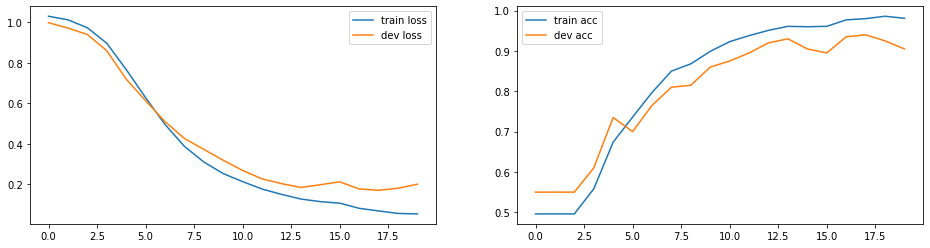






#**EXP 2: embedding size= 40, other parameters unchanged compared to EXP 1**

Lab8LSTMClassifier(
  (embedding): Embedding(40, 40)
  (lstm): LSTM(40, 64, batch_first=True, bidirectional=True)
  (dense): Linear(in_features=128, out_features=3, bias=True)
)

epoch=19 -- train_loss=0.050 - train_accuracy=98.2% - dev_loss=0.155 - dev_accuracy=93.0%

Test accuracy: 95.0%

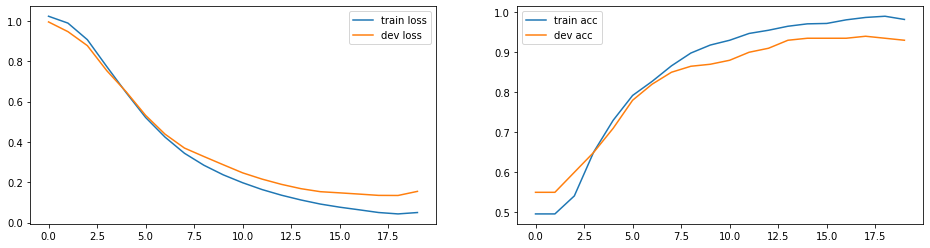


#**EXP 3: number of layers = 3, other parameters unchanged compared to EXP 1**

Lab8LSTMClassifier(
  (embedding): Embedding(40, 30)
  (lstm): LSTM(30, 64, num_layers=3, batch_first=True, bidirectional=True)
  (dense): Linear(in_features=128, out_features=3, bias=True)
)

epoch=19 -- train_loss=0.054 - train_accuracy=98.4% - dev_loss=0.114 - dev_accuracy=95.5%

Test accuracy: 93.5%

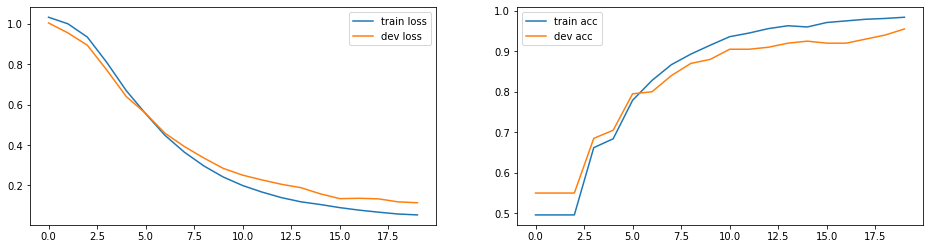


#**EXP 4: number of layers =10, other parameters unchanged compared to EXP 1**

Lab8LSTMClassifier(
  (embedding): Embedding(40, 30)
  (lstm): LSTM(30, 64, num_layers=10, batch_first=True, bidirectional=True)
  (dense): Linear(in_features=128, out_features=3, bias=True)
)

epoch=19 -- train_loss=0.055 - train_accuracy=98.4% - dev_loss=0.149 - dev_accuracy=93.5%

Test accuracy: 92.0%

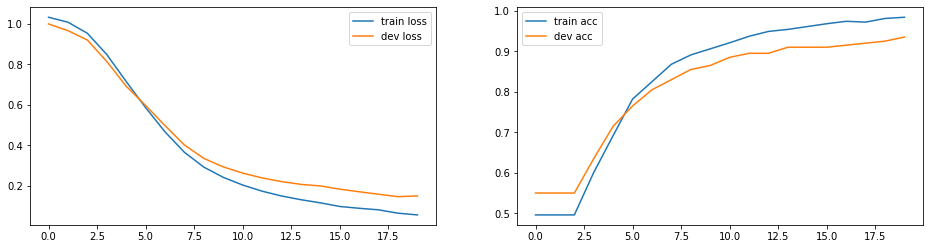


#**EXP 5: Unidirectional LSTM, other parameters unchanged compared to EXP 1**

Lab8LSTMClassifier(
  (embedding): Embedding(40, 30)
  (lstm): LSTM(30, 64, batch_first=True)
  (dense): Linear(in_features=64, out_features=3, bias=True)
)

epoch=19 -- train_loss=0.074 - train_accuracy=97.6% - dev_loss=0.154 - dev_accuracy=93.5%

Test accuracy: 91.5%

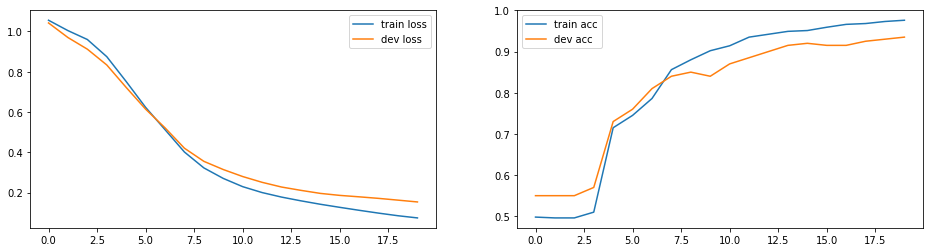


#**EXP 6: dropout== 0.2, other parameters unchanged compared to EXP 1**

Lab8LSTMClassifier(
  (embedding): Embedding(40, 30)
  (lstm): LSTM(30, 64, batch_first=True, bidirectional=True)
  (dense): Linear(in_features=128, out_features=3, bias=True)
)

epoch=19 -- train_loss=0.052 - train_accuracy=98.7% - dev_loss=0.170 - dev_accuracy=92.5%

Test accuracy: 93.0%

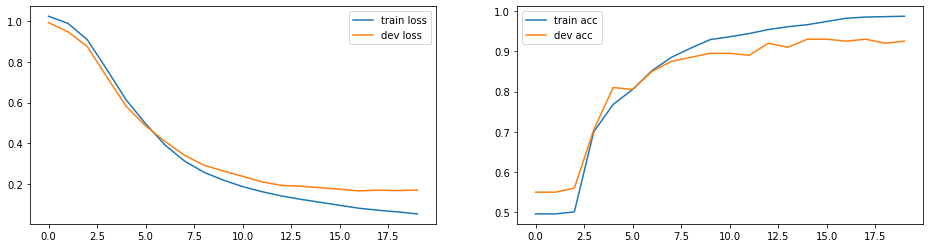


#**EXP 7: dropout = 0.6, other parameters unchanged compared to EXP 1**

Lab8LSTMClassifier(
  (embedding): Embedding(40, 30)
  (lstm): LSTM(30, 64, batch_first=True, bidirectional=True)
  (dense): Linear(in_features=128, out_features=3, bias=True)
)

epoch=19 -- train_loss=0.064 - train_accuracy=98.0% - dev_loss=0.150 - dev_accuracy=93.5%

Test accuracy: 92.5%

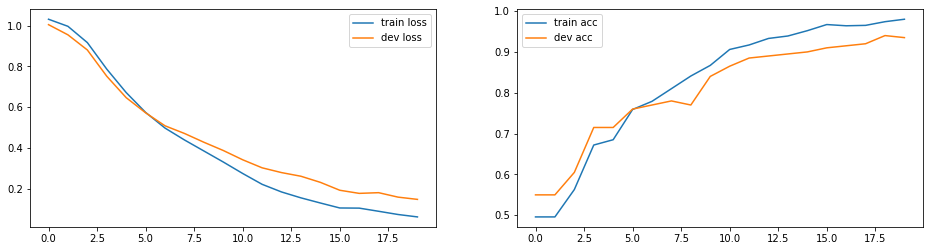

#**EXP 8: embedding size = 80, other parameters unchanged compared to EXP 1**

Lab8LSTMClassifier(
  (embedding): Embedding(40, 80)
  (lstm): LSTM(80, 64, batch_first=True, bidirectional=True)
  (dense): Linear(in_features=128, out_features=3, bias=True)
)

epoch=19 -- train_loss=0.026 - train_accuracy=99.4% - dev_loss=0.147 - dev_accuracy=93.5%

Test accuracy: 93.5%

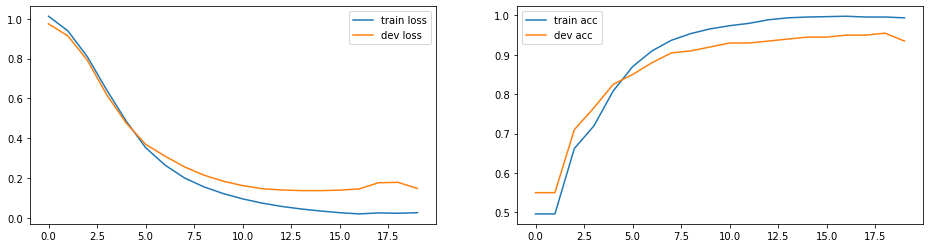

#**Conclusion:**

1. *Embedding size*: From EXP 1, EXP 2 and EXP 8 => embedding size around 40 is reasonable because the test accuracy of EXP 2 (40) is much better than EXP 1 (30) and EXP 8 (80). Embedding size should not be too big, which might cause decrease in accuracy.

2. *number of layer:* From EXP 1, EXP 3 nad EXP 4 => 
number of layer around 3 is good because the test accuracy of EXP 3 (3) is much better than EXP 1 (1) and EXP 4 (10). Number of layers should not be too big like 10, which also causes decrease in accuracy.

3. *uni or bi-directional LSTM*: from EXP 1 and EXP 5 => bidirectional LSTM seems a bit more accurate than unidirectional LSTM.

4. *dropout:* from EXP 1, EXP 6 and EXP 7 => dropout value around 0.2 is good. if dropout is quite big like 0.6, the accuracy decreases.

## Task 2 - Early stopping

Implement early stopping. Early stopping should halt the training process if the development loss and accuracy no longer improve. You can assume they no longer improve if there is no positive change for `patience` epochs where `patience` is usually set to 2 or 3. You can come up with a more sophisticated stopping criteria.

When does the training process stop? 
What's the advantage of using early stopping?
Summarize your findings in the following cell.

YOUR ANSWER HERE

#**model parameters:** + CODE

*value chosen according to experience in Task 1:*

vocab_size = len(vocab)

embedding_size = 40

hidden_size = 64

output_size = train_df.label.nunique()

number_of_layers=3

BiOrUni=True

dropOut= 0.2

**number of epochs: = 60** 

**batch size =128 (unchanged)**

In [392]:
# Re instantiate the model: (must run the model task 1 again before runing this cell)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [393]:
num_epochs = 60
batch_size = 128

metrics = defaultdict(list)
#train_iter = BatchedIterator(X_train, seqlen_train, y_train, batch_size=batch_size)

# FOR TASK 3:
train_iter = Lab8BatchedIterator(X_train, seqlen_train, y_train, batch_size=batch_size, shuffle=True)

In [394]:


tr_loss_0 =0
val_loss_0=0

tr_loss_1 =0
val_loss_1 =0

# MODIFIED CODE:

for epoch in range(num_epochs):
    model.train()
    # Training loop
    for X_batch, seqlen_batch, y_batch in train_iter.iterate_once():
          #TASK 3:
        '''
        # Test for task 3 whether batches are shuffled for each epoch???
        print("====a batch=====")
        print(X_batch)
        print(seqlen_batch)
        print(y_batch)
        print("====a batch=====")
        '''
        y_out = model(X_batch, seqlen_batch)
        loss = criterion(y_out, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    model.eval()  # or model.train(False)
    # Train and dev loss at the end of the epoch
    y_out = model(X_train, seqlen_train)
    train_loss = criterion(y_out, y_train).item()
    metrics['train_loss'].append(train_loss)
    labels = y_out.argmax(axis=1)
    train_accuracy = (torch.eq(y_train, labels).sum() / labels.size(0)).item()
    metrics['train_accuracy'].append(train_accuracy)
    
    y_out = model(X_dev, seqlen_dev)
    dev_loss = criterion(y_out, y_dev).item()
    metrics['dev_loss'].append(dev_loss)
    labels = y_out.argmax(axis=1)
    dev_accuracy = (torch.eq(y_dev, labels).sum() / labels.size(0)).item()
    metrics['dev_accuracy'].append(dev_accuracy)

   # MODIFIED FOR TASK 2
    if epoch == 0:
      train_acc_0= train_accuracy
      dev_acc_0 = dev_accuracy

      tr_loss_0 = train_loss
      val_loss_0 = dev_loss
    if epoch == 1 :
      train_acc_1= train_accuracy
      dev_acc_1 = dev_accuracy
      
      tr_loss_1 = train_loss
      val_loss_1 = dev_loss
    if epoch > 1:
      if round(tr_loss_1 - tr_loss_0,3) >= 0 and round(val_loss_1- val_loss_0,3) <= 0:  #or (train_acc_1-train_acc_0 == 0 and dev_acc_1-dev_acc_0 == 0) :  
        print(f'train_loss={round(tr_loss_1 - tr_loss_0,3)}, dev_loss={round(val_loss_1- val_loss_0,3)}')
        break
      else:
        print(f'train_loss={round(tr_loss_1- tr_loss_0,3)}, dev_loss={round(val_loss_1- val_loss_0,3)}')
        #train_acc_0 = train_acc_1
        #dev_acc_0 = dev_acc_1
        #train_acc_1 = train_accuracy
        #dev_acc_1 = dev_accuracy

        tr_loss_0 = tr_loss_1
        val_loss_0 = val_loss_1
        tr_loss_1 = train_loss
        val_loss_1 = dev_loss

    print(f"epoch={epoch} -- train_loss={train_loss:.3f} - train_accuracy={train_accuracy:.1%} - dev_loss={dev_loss:.3f} - dev_accuracy={dev_accuracy:.1%}")

epoch=0 -- train_loss=1.100 - train_accuracy=68.5% - dev_loss=1.096 - dev_accuracy=69.0%
epoch=1 -- train_loss=0.943 - train_accuracy=68.5% - dev_loss=0.938 - dev_accuracy=69.0%
train_loss=-0.157, dev_loss=-0.158
epoch=2 -- train_loss=0.926 - train_accuracy=68.5% - dev_loss=0.924 - dev_accuracy=69.0%
train_loss=-0.017, dev_loss=-0.014
epoch=3 -- train_loss=0.882 - train_accuracy=68.5% - dev_loss=0.887 - dev_accuracy=69.0%
train_loss=-0.044, dev_loss=-0.037
epoch=4 -- train_loss=0.831 - train_accuracy=68.5% - dev_loss=0.842 - dev_accuracy=69.0%
train_loss=-0.051, dev_loss=-0.046
epoch=5 -- train_loss=0.752 - train_accuracy=68.5% - dev_loss=0.768 - dev_accuracy=69.0%
train_loss=-0.079, dev_loss=-0.074
epoch=6 -- train_loss=0.648 - train_accuracy=69.7% - dev_loss=0.662 - dev_accuracy=71.5%
train_loss=-0.103, dev_loss=-0.106
epoch=7 -- train_loss=0.548 - train_accuracy=74.9% - dev_loss=0.566 - dev_accuracy=77.0%
train_loss=-0.101, dev_loss=-0.096
epoch=8 -- train_loss=0.447 - train_accurac

#**EXPERIENCE:**

Results: process stops at
epoch=26 -- train_loss=0.021 - train_accuracy=99.6% - dev_loss=0.126 - dev_accuracy=95.5%


Test accuracy: 95.0%

=>> The model has improved to from 92.5 % (oiriginal model in EXP 1) to 95.5 %

## Task 3 - Shuffling batches

`BatchedIterator` currently yields each batch in the order they are in. Add a shuffling option to the class. If True, it should yield the batches in random order. Make sure that it is randomized for each epoch, not just once.

Does it improve the training process?

# CODE:

In [342]:
class Lab8BatchedIterator:
    def __init__(self, *tensors, batch_size, **kwarg):
        # all tensors must have the same first dimension
        assert len(set(len(tensor) for tensor in tensors)) == 1
        self.tensors = tensors
        self.batch_size = batch_size
        # check the shuffle option:
        for keyword, value in kwarg.items():
            if keyword == "shuffle":
                self.shuffle=value
    
    # MODIFIED FOR TASK 3:
    def iterate_once(self):
        num_data = len(self.tensors[0])


        if self.shuffle== False:
          for start in range(0, num_data, self.batch_size):
              end = start + self.batch_size
              yield tuple(tensor[start:end] for tensor in self.tensors) # how 'yield' works? :
                                                                        # reference: https://www.geeksforgeeks.org/use-yield-keyword-instead-return-keyword-python/#:~:text=The%20yield%20statement%20suspends%20function's,where%20it%20is%20left%20off.&text=A%20generator%20function%20is%20defined,yield%20keyword%20rather%20than%20return.
        else:
          all_batches=[] # to gather all the batches formed form the dataset
          for start in range(0, num_data, self.batch_size):
              end = start + self.batch_size
              all_batches.append(tuple(tensor[start:end] for tensor in self.tensors))
          
          # shuffle the batches: 
          # reference: https://note.nkmk.me/en/python-random-shuffle/#:~:text=To%20randomly%20shuffle%20elements%20of,Python%2C%20use%20the%20random%20module.&text=random%20provides%20shuffle()%20that,used%20for%20strings%20and%20tuples.
          shuf_batches = random.sample(all_batches, len(all_batches))

          # yield a batch in the list at a time:
          for i in range (0,len(shuf_batches)):
            yield shuf_batches[i]

#**Experience:**

With all the same parameters as TASK 2:

Result:

Test accuracy: 94.0%

=> a bit better than TASK 1


## Task 4 - Sorting by length

The inputs of recurrent neural networks are often sorted in decreasing order by sequence length. Sort the train data by length.

You should only do this on the train set.

Summarize your findings.

# EXPERIENCE:

# The code has been included in to 'TASK 4:' after the section 'Preprocessing':

**Model parameter:**

vocab_size = len(vocab)

embedding_size = 40

hidden_size = 64

output_size = train_df.label.nunique()

number_of_layers=3

BiOrUni=True

dropOut= 0.2


model = Lab8LSTMClassifier(vocab_size, embedding_size, hidden_size, output_size, number_of_layers, BiOrUni, dropOut)
model

num_epochs = 50

batch_size = 128

metrics = defaultdict(list)

train_iter = Lab8BatchedIterator(X_train, seqlen_train, y_train, batch_size=batch_size, shuffle=True)




**Conclusion:**

After the sorting the train_df in decreasing sequence length:

Test accuracy: 94.5%

the Accuracy has increased from 94% to 94.5 % (compared to Task 3)



## Task 5 - Another dataset

Find another reasonable classification task in [Unimorph](https://unimorph.github.io/).
You can pick any of the 110 languages as long as there is enough data.

The errors are listed at the end of the notebook.
What kind of errors does the model make?
If you understand the language, try to explain the source of the errors.

Summarize your findings on the new dataset in the following cell.

#Experience:

# The modify code is added at section 'TASK 5:'after the section 'Cloning the data repository' 


**Model parameter:**

vocab_size = len(vocab)

embedding_size = 40

hidden_size = 64

output_size = train_df.label.nunique()

number_of_layers=3

BiOrUni=True

dropOut= 0.2


model = Lab8LSTMClassifier(vocab_size, embedding_size, hidden_size, output_size, number_of_layers, BiOrUni, dropOut)
model

num_epochs = 60

batch_size = 128

metrics = defaultdict(list)

train_iter = Lab8BatchedIterator(X_train, seqlen_train, y_train, batch_size=batch_size, shuffle=True)

The train_df also sorted in decreasing order of the sequence length.

**Results:**

epoch=35 -- train_loss=0.005 - train_accuracy=100.0% - dev_loss=0.006 - dev_accuracy=100.0%


Test accuracy: 99.5%

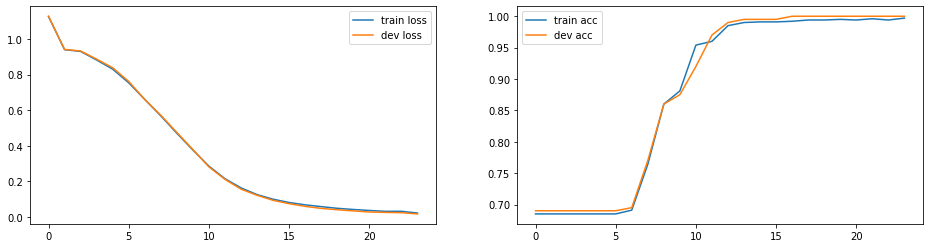



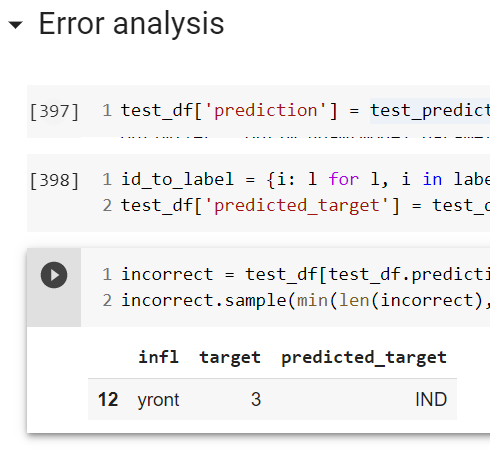

**I can not find Vietnamese unimorph, so i use French unimorph but unfortunately, i do not understand French. I can not explain why it is wrong :(**



## Task 6 - Padding at the batch level

Now that the data is sorted by length, most batches have far too many PAD symbols. Change the padding process so that it works at the batch level and not the dataset level. You should write a new `PaddedBatchIterator` class for this.

Summarize your findings in the following cell.

YOUR ANSWER HERE

In [1]:
import pandas as pd
import numpy as np
import os
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

import torch
import torch.nn as nn
import torch.optim as optim

# FOR TASK 3:
import random

# Cloning the data repository

In [95]:
language = "hun"
unimorph_path = f"data/unimorph_{language}/"
pipe = subprocess.Popen(f"git clone https://github.com/unimorph/{language}.git {unimorph_path}",
                        shell=True, stderr=subprocess.PIPE, stdout=subprocess.PIPE)
stdout, stderr = pipe.communicate()
print(stdout.decode('utf8'))
print(stderr.decode('utf8'))


fatal: destination path 'data/unimorph_hun' already exists and is not an empty directory.



# TASK 5:


In [373]:
# DOWNLOADING AND PROCESSING THE DATA LIKE FOR 'hun' unimorph:

language = "frm"
unimorph_path = f"data/unimorph_{language}/"
pipe = subprocess.Popen(f"git clone https://github.com/unimorph/{language}.git {unimorph_path}",
                        shell=True, stderr=subprocess.PIPE, stdout=subprocess.PIPE)
stdout, stderr = pipe.communicate()
print(stdout.decode('utf8'))
print(stderr.decode('utf8'))



fatal: destination path 'data/unimorph_frm' already exists and is not an empty directory.



**End of task 5.**

# Data loading

In [374]:
data = pd.read_table(f"{unimorph_path}/{language}", names=['lemma', 'infl', 'tags'], skip_blank_lines=True)

# Target extraction

In [375]:
def extract_target(tags_str):
    """Extracts target if present, returns None otherwise."""
    tags = tags_str.split(";")
    if tags[0] != 'V':
        return None
    if len(tags) < 6:
        return None
    return tags[1]
 
data['target'] = data.tags.apply(extract_target)

In [376]:
data = data[data.target.notnull()]

In [377]:
data['target'].value_counts()
data

,lemma,infl,tags,target
3,acoustrer,acoustrast,V;3;SG;SBJV;PST;IPFV,3
5,acoustrer,acoustrerent,V;IND;PST;3;PL;PFV,IND
11,acoustrer,acoustrions,V;IND;PST;1;PL;IPFV;LGSPEC1,IND
12,acoustrer,acoustryons,V;IND;PST;1;PL;IPFV;LGSPEC2,IND
14,acoustrer,acoustrasmes,V;IND;PST;1;PL;PFV,IND
...,...,...,...,...
36963,faucer,fauçois,V;IND;PST;1;SG;IPFV;LGSPEC1,IND
36964,faucer,fauçoys,V;IND;PST;1;SG;IPFV;LGSPEC2,IND
36965,faucer,fauciez,V;IND;PST;2;PL;IPFV;LGSPEC1,IND
36966,faucer,faucyez,V;IND;PST;2;PL;IPFV;LGSPEC2,IND


# Train/dev/test set creation

We avoid lemma overlaps between the splits.

In [378]:
lemmas = data.lemma.unique()
len(lemmas), type(lemmas)

(602, numpy.ndarray)

In [379]:
np.random.seed(12)
np.random.shuffle(lemmas)
train_size = int(0.8 * len(lemmas))
dev_size = int(0.1 * len(lemmas))
train_lemmas = lemmas[:train_size]
dev_lemmas = lemmas[train_size:train_size+dev_size]
test_lemmas = lemmas[train_size+dev_size:]

train_lemmas = set(train_lemmas)
dev_lemmas = set(dev_lemmas)
test_lemmas = set(test_lemmas)

In [380]:
train_df = data[data.lemma.isin(train_lemmas)]
dev_df = data[data.lemma.isin(dev_lemmas)]
test_df = data[data.lemma.isin(test_lemmas)]
len(train_df), len(dev_df), len(test_df)
train_df

,lemma,infl,tags,target
3,acoustrer,acoustrast,V;3;SG;SBJV;PST;IPFV,3
5,acoustrer,acoustrerent,V;IND;PST;3;PL;PFV,IND
11,acoustrer,acoustrions,V;IND;PST;1;PL;IPFV;LGSPEC1,IND
12,acoustrer,acoustryons,V;IND;PST;1;PL;IPFV;LGSPEC2,IND
14,acoustrer,acoustrasmes,V;IND;PST;1;PL;PFV,IND
...,...,...,...,...
36963,faucer,fauçois,V;IND;PST;1;SG;IPFV;LGSPEC1,IND
36964,faucer,fauçoys,V;IND;PST;1;SG;IPFV;LGSPEC2,IND
36965,faucer,fauciez,V;IND;PST;2;PL;IPFV;LGSPEC1,IND
36966,faucer,faucyez,V;IND;PST;2;PL;IPFV;LGSPEC2,IND


In [381]:
train_df = train_df.sample(1000, random_state=1).reset_index(drop=True)
dev_df = dev_df.sample(200, random_state=1).reset_index(drop=True)
test_df = test_df.sample(200, random_state=1).reset_index(drop=True)

# Preprocessing

In [104]:
alphabet = set()
for token in train_df.infl:
    alphabet |= set(token)
len(alphabet)

36

In [49]:
alphabet.add('<PAD>')
alphabet.add('<BOS>')
alphabet.add('<EOS>')
alphabet.add('<UNK>')

In [50]:
vocab = {symbol: i for i, symbol in enumerate(alphabet)}
len(vocab)

40

In [382]:
def encode_token(token):
    ids = []
    ids.append(vocab['<BOS>'])
    # dev and test might contain characters outside the alphabet
    ids.extend(vocab.get(c, vocab['<UNK>']) for c in token)
    ids.append(vocab['<EOS>'])
    return ids

#print(f"{encode_token('alma') = }")
#print(f"{vocab['<UNK>'] = }")
#print(f"{encode_token('ALMA') = }")

In [383]:
train_df['encoded'] = train_df.infl.apply(encode_token)
dev_df['encoded'] = dev_df.infl.apply(encode_token)
test_df['encoded'] = test_df.infl.apply(encode_token)
train_df.head()

,lemma,infl,tags,target,encoded
0,tuer,tua,V;IND;PST;1;SG;PFV,IND,"[10, 8, 33, 35, 36]"
1,advouer,advouoys,V;IND;PST;1;SG;IPFV;LGSPEC2,IND,"[10, 35, 5, 2, 30, 33, 30, 28, 22, 36]"
2,dancer,dançast,V;3;SG;SBJV;PST;IPFV,3,"[10, 5, 35, 11, 3, 35, 22, 8, 36]"
3,inquieter,inquietoit,V;IND;PST;3;SG;IPFV;LGSPEC1,IND,"[10, 14, 11, 3, 33, 14, 26, 8, 30, 14, 8, 36]"
4,alimenter,alimentast,V;3;SG;SBJV;PST;IPFV,3,"[10, 35, 21, 14, 15, 26, 11, 8, 35, 22, 8, 36]"


In [384]:
maxlen = train_df.encoded.apply(len).max()
print(maxlen)

def pad_sequence(sequence):
    if len(sequence) > maxlen:
        return sequence[:maxlen]
    return sequence + [vocab['<PAD>'] for _ in range(maxlen-len(sequence))]

print(pad_sequence([1, 2, 3]))

24
[1, 2, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [385]:
train_df['padded'] = train_df.encoded.apply(pad_sequence)
dev_df['padded'] = dev_df.encoded.apply(pad_sequence)
test_df['padded'] = test_df.encoded.apply(pad_sequence)

train_df['padded'].apply(len).value_counts()

24    1000
Name: padded, dtype: int64

# TASK 4: 

column 'seqlen' is used for sorting the train data in decreasing value of sequence length

In [386]:
train_df['seqlen'] = train_df.encoded.apply(len)
dev_df['seqlen'] = dev_df.encoded.apply(len)
test_df['seqlen'] = test_df.encoded.apply(len)


sorting the train data:

In [387]:
train_df.sort_values("seqlen", axis = 0, ascending = False,
                      inplace = True, na_position ='last')
train_df

,lemma,infl,tags,target,encoded,padded,seqlen
333,entrefrapper,nous entrefrappassions,V;1;PL;SBJV;PST;IPFV,1,"[10, 11, 30, 33, 22, 32, 26, 11, 8, 37, 26, 27...","[10, 11, 30, 33, 22, 32, 26, 11, 8, 37, 26, 27...",24
100,entrehurter,nous entrehurtassions,V;1;PL;SBJV;PST;IPFV,1,"[10, 11, 30, 33, 22, 32, 26, 11, 8, 37, 26, 39...","[10, 11, 30, 33, 22, 32, 26, 11, 8, 37, 26, 39...",23
465,entrefraper,nous entrefrapassions,V;1;PL;SBJV;PST;IPFV,1,"[10, 11, 30, 33, 22, 32, 26, 11, 8, 37, 26, 27...","[10, 11, 30, 33, 22, 32, 26, 11, 8, 37, 26, 27...",23
611,entrempescher,s'entrempescherent,V;IND;PST;3;PL;PFV,IND,"[10, 22, 3, 26, 11, 8, 37, 26, 15, 31, 26, 22,...","[10, 22, 3, 26, 11, 8, 37, 26, 15, 31, 26, 22,...",20
814,desconseiller,desconseillassent,V;3;PL;SBJV;PST;IPFV,3,"[10, 5, 26, 22, 23, 30, 11, 22, 26, 14, 21, 21...","[10, 5, 26, 22, 23, 30, 11, 22, 26, 14, 21, 21...",19
...,...,...,...,...,...,...,...
598,faire,fet,V;IND;PRS;3;SG;LGSPEC2,IND,"[10, 27, 26, 8, 36]","[10, 27, 26, 8, 36, 7, 7, 7, 7, 7, 7, 7, 7, 7,...",5
586,ozer,oza,V;IND;PST;3;SG;PFV,IND,"[10, 30, 0, 35, 36]","[10, 30, 0, 35, 36, 7, 7, 7, 7, 7, 7, 7, 7, 7,...",5
237,avoir,eus,V;IND;PST;2;SG;PFV,IND,"[10, 26, 33, 22, 36]","[10, 26, 33, 22, 36, 7, 7, 7, 7, 7, 7, 7, 7, 7...",5
357,mettre,mit,V;IND;PST;3;SG;PFV,IND,"[10, 15, 14, 8, 36]","[10, 15, 14, 8, 36, 7, 7, 7, 7, 7, 7, 7, 7, 7,...",5


**END OF TASK 4**

# Label:

In [388]:
label_to_id = {label: i for i, label in enumerate(train_df.target.unique())}
label_to_id

{'1': 0, '2': 3, '3': 2, 'IND': 1}

In [389]:
train_df['label'] = train_df.target.apply(lambda c: label_to_id[c])
dev_df['label'] = dev_df.target.apply(lambda c: label_to_id[c])
test_df['label'] = test_df.target.apply(lambda c: label_to_id[c])

# Creating tensors

In [390]:
X_train = torch.from_numpy(np.array(list(train_df.padded)))
y_train = torch.LongTensor(train_df.label.values)
seqlen_train = torch.LongTensor(train_df.seqlen.values)
print(f"X_train.size() ={X_train.size()},\ny_train.size() ={y_train.size()}\nseqlen_train.size() ={seqlen_train.size()}\n")

X_dev = torch.from_numpy(np.array(list(dev_df.padded)))
y_dev = torch.LongTensor(dev_df.label.values)
seqlen_dev = torch.LongTensor(dev_df.seqlen.values)
print(f"X_dev.size() ={X_dev.size()},\ny_dev.size() ={y_dev.size()}\nseqlen_dev.size() ={seqlen_dev.size()}\n")

X_test = torch.from_numpy(np.array(list(test_df.padded)))
y_test = torch.LongTensor(test_df.label.values)
seqlen_test = torch.LongTensor(test_df.seqlen.values)
print(f"X_test.size() ={X_test.size()},\ny_test.size() ={y_test.size()}\nseqlen_test.size() ={seqlen_test.size()}")

X_train.size() =torch.Size([1000, 24]),
y_train.size() =torch.Size([1000])
seqlen_train.size() =torch.Size([1000])

X_dev.size() =torch.Size([200, 24]),
y_dev.size() =torch.Size([200])
seqlen_dev.size() =torch.Size([200])

X_test.size() =torch.Size([200, 24]),
y_test.size() =torch.Size([200])
seqlen_test.size() =torch.Size([200])


# Model

In [62]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, output_size):
        super().__init__()
        self.embedding = nn.Embedding(input_size, embedding_size)
        self.lstm = nn.LSTM(
            input_size=embedding_size,
            hidden_size=hidden_size,
            num_layers=1,
            bidirectional=True,
            batch_first=True,
        )
        self.dense = nn.Linear(hidden_size * 2, output_size)
        
    # the input signature of forward changes
    def forward(self, sequences, sequence_lens):
        embedded = self.embedding(sequences)
        
        # THIS IS THE MODIFIED PART
        # returns a PackedSequence object
        packed = nn.utils.rnn.pack_padded_sequence(
            embedded,
            sequence_lens,
            enforce_sorted=False,
            batch_first=True)
        packed_outputs, (h, c) = self.lstm(packed)
        # extract LSTM outputs (not used here)
        lstm_outputs, lens = nn.utils.rnn.pad_packed_sequence(packed_outputs)
        
        h = torch.cat((h[0], h[1]), dim=-1)
        output = self.dense(h)
        return output

In [63]:
input_size = len(vocab)
embedding_size = 30
hidden_size = 64 # number of hidden cells in the hidden layer
output_size = train_df.label.nunique()

model = LSTMClassifier(input_size, embedding_size, hidden_size, output_size)
model

LSTMClassifier(
  (embedding): Embedding(40, 30)
  (lstm): LSTM(30, 64, batch_first=True, bidirectional=True)
  (dense): Linear(in_features=128, out_features=3, bias=True)
)

# Batching

In [64]:
class BatchedIterator:
    def __init__(self, *tensors, batch_size):
        # all tensors must have the same first dimension
        assert len(set(len(tensor) for tensor in tensors)) == 1
        self.tensors = tensors
        self.batch_size = batch_size
    
    def iterate_once(self):
        num_data = len(self.tensors[0])
        for start in range(0, num_data, self.batch_size):
            end = start + self.batch_size
            yield tuple(tensor[start:end] for tensor in self.tensors)

# Training

In [277]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [278]:
num_epochs = 20
batch_size = 128

metrics = defaultdict(list)
train_iter = BatchedIterator(X_train, seqlen_train, y_train, batch_size=batch_size)


In [231]:

for epoch in range(num_epochs):
    model.train()
    # Training loop
    
    for X_batch, seqlen_batch, y_batch in train_iter.iterate_once():    
        y_out = model(X_batch, seqlen_batch)
        loss = criterion(y_out, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
     
    model.eval()  # or model.train(False)

    # Train and dev loss at the end of the epoch
    y_out = model(X_train, seqlen_train)
    train_loss = criterion(y_out, y_train).item()
    metrics['train_loss'].append(train_loss)
    labels = y_out.argmax(axis=1)
    train_accuracy = (torch.eq(y_train, labels).sum() / labels.size(0)).item()
    metrics['train_accuracy'].append(train_accuracy)
    
    y_out = model(X_dev, seqlen_dev)
    dev_loss = criterion(y_out, y_dev).item()
    metrics['dev_loss'].append(dev_loss)
    labels = y_out.argmax(axis=1)
    dev_accuracy = (torch.eq(y_dev, labels).sum() / labels.size(0)).item()
    metrics['dev_accuracy'].append(dev_accuracy)
    
    print(f"epoch={epoch} -- train_loss={train_loss:.3f} - train_accuracy={train_accuracy:.1%} - dev_loss={dev_loss:.3f} - dev_accuracy={dev_accuracy:.1%}")

epoch=0 -- train_loss=1.021 - train_accuracy=49.6% - dev_loss=0.990 - dev_accuracy=55.0%
epoch=1 -- train_loss=0.979 - train_accuracy=49.6% - dev_loss=0.932 - dev_accuracy=55.0%
epoch=2 -- train_loss=0.907 - train_accuracy=53.7% - dev_loss=0.852 - dev_accuracy=58.0%
epoch=3 -- train_loss=0.807 - train_accuracy=62.1% - dev_loss=0.748 - dev_accuracy=68.0%
epoch=4 -- train_loss=0.701 - train_accuracy=70.1% - dev_loss=0.656 - dev_accuracy=71.5%
epoch=5 -- train_loss=0.580 - train_accuracy=77.3% - dev_loss=0.570 - dev_accuracy=74.5%
epoch=6 -- train_loss=0.462 - train_accuracy=81.1% - dev_loss=0.476 - dev_accuracy=78.5%
epoch=7 -- train_loss=0.379 - train_accuracy=85.4% - dev_loss=0.432 - dev_accuracy=81.5%
epoch=8 -- train_loss=0.314 - train_accuracy=87.6% - dev_loss=0.387 - dev_accuracy=81.5%
epoch=9 -- train_loss=0.264 - train_accuracy=90.0% - dev_loss=0.338 - dev_accuracy=84.5%
epoch=10 -- train_loss=0.225 - train_accuracy=91.7% - dev_loss=0.295 - dev_accuracy=85.5%
epoch=11 -- train_lo

# Evaluation

## Plot the results

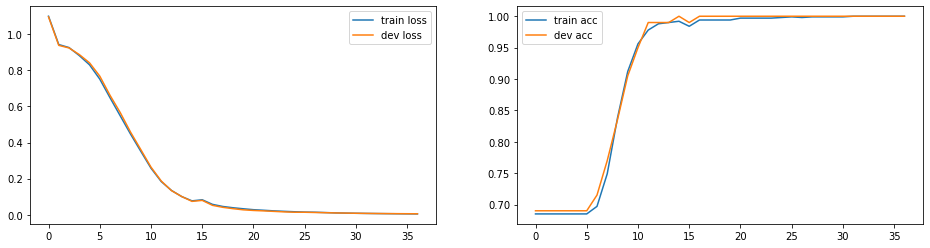

In [396]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

sns.lineplot(data=metrics['train_loss'], ax=ax[0], label='train loss')
sns.lineplot(data=metrics['dev_loss'], ax=ax[0], label='dev loss')

sns.lineplot(data=metrics['train_accuracy'], ax=ax[1], label='train acc')
sns.lineplot(data=metrics['dev_accuracy'], ax=ax[1], label='dev acc')

## Test accuracy

In [395]:
logits = model(X_test, seqlen_test)
test_prediction = logits.argmax(axis=1)
test_accuracy = torch.sum(torch.eq(test_prediction, y_test)) / test_prediction.size(0)
print(f"Test accuracy: {test_accuracy:.1%}")

Test accuracy: 99.5%


## Error analysis

In [397]:
test_df['prediction'] = test_prediction

In [398]:
id_to_label = {i: l for l, i in label_to_id.items()}
test_df['predicted_target'] = test_df['prediction'].apply(lambda id_: id_to_label[id_])

In [399]:
incorrect = test_df[test_df.prediction != test_df.label][['infl', 'target', 'predicted_target']]
incorrect.sample(min(len(incorrect), 20))

,infl,target,predicted_target
12,yront,3,IND
